## House price prediction

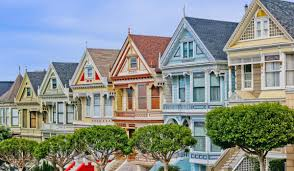

#### Abount the Dataset
Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley,1980. N.B. Various transformations are used in the table on pages 244-261. Quinlan (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

** Relevant Information: Concerns housing values in suburbs of Boston.

** Number of Instances: 509

** Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

Attribute Information:
1) CRIM : per capita crime rate by town

2) ZN : proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5) NOX : nitric oxides concentration (parts per 10 million)

6) RM : average number of rooms per dwelling

7) AGE : proportion of owner-occupied units built prior to 1940

8) DIS : weighted distances to five Boston employment centres

9) RAD : index of accessibility to radial highways

10) TAX : full-value property-tax rate per $10,000

11) PTRATIO : pupil-teacher ratio by town

12) B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

14) MEDV : Median value of owner-occupied homes in $1000's

### Objective:
** Understand the Dataset and data cleaning.

** Build Regression models to predict the value w.r.t a single & multiple feature.

** Also evaluate the models & compare thier respective scores like R2_scores, mean_squared_error,cross_val_score,etc.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

sns.set(color_codes =True)
sns.set_palette(palette = 'magma', n_colors = 9)

### Loading the dataset

In [2]:
df = pd.read_csv(r"/kaggle/input/house/Housing.csv")
df.head() # Read the dataset and taking a look at the first 5 rows of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [3]:
## taking a look at the last 5 rows of the dataset
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0
508,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1.0,273,21.0,396.90,7.88,11.9


In [4]:
## Checking the shape of the dataset
df.shape

(509, 14)

In [5]:
## checking the columns names
col = df.columns
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
## Checking the duplicate values
df.duplicated().sum()

4

In [7]:
## delete the duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
## checking missing values
df.isna().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

# Missing values
how to deal with missing values, you have tree option.
1. Get rid of the missing data points
2. delete the mising values columns and row.
3. Set the values of some value( mean ,meadian, mode).



In [9]:
# option 1 dropna
df.dropna().shape

(497, 14)

In [10]:
## Set the values of some value( mean ,meadian, mode) option 3
df["INDUS"] = df["INDUS"].fillna(df["INDUS"].median())

In [11]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

In [12]:
## fillna for using the sklearn libires for Simpleimputer ony used the liabries are numbric values.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df_1 = imputer.fit_transform(df)
df = pd.DataFrame(df_1)
df.columns=col

In [13]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
## checking the dtypes detail wise
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [15]:
## convert the dtypes particulars columns float64 to int64.
df["AGE"] = df["AGE"].astype(int)
df["ZN"] = df["ZN"].astype(int)
df["RAD"] = df["RAD"].astype(int)
df["TAX"] = df["TAX"].astype(int)

In [16]:
## after change columns dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    int64  
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    int64  
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.4 KB


Insight of the dtypes columns are float64(11), int64(4)

In [17]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0.0,0.538,6.575,65,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0,7.07,0.0,0.469,6.421,78,4.9671,2,242,17.8,396.9,9.14,21.6


### Getting the statistical summary of dataset

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,505.0,3.606091,8.608447,0.00632,0.08199,0.25387,3.67367,88.9762
ZN,505.0,11.370297,23.328220,0.00000,0.00000,0.00000,12.00000,100.0000
INDUS,505.0,11.151307,6.843323,0.46000,5.19000,9.69000,18.10000,27.7400
CHAS,505.0,0.069307,0.254227,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,505.0,0.554679,0.115693,0.38500,0.44900,0.53800,0.62400,0.8710
RM,505.0,6.284816,0.703302,3.56100,5.88500,6.20900,6.62500,8.7800
AGE,505.0,68.114851,28.216754,2.00000,45.00000,77.00000,94.00000,100.0000
DIS,505.0,3.798725,2.106167,1.12960,2.10070,3.21570,5.21190,12.1265
RAD,505.0,9.522772,8.690899,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,505.0,407.726733,168.312294,187.00000,279.00000,330.00000,666.00000,711.0000


## Data Visualization

### Histogram
A histogram is a display of statistical information that uses rectangles to show the frequency of data items in successive numerical intervals of equal size.

In [19]:
## According to numerical dataset visualization for histplot
#df.hist(bins=50,figsize=(20,15))
#plt.show()

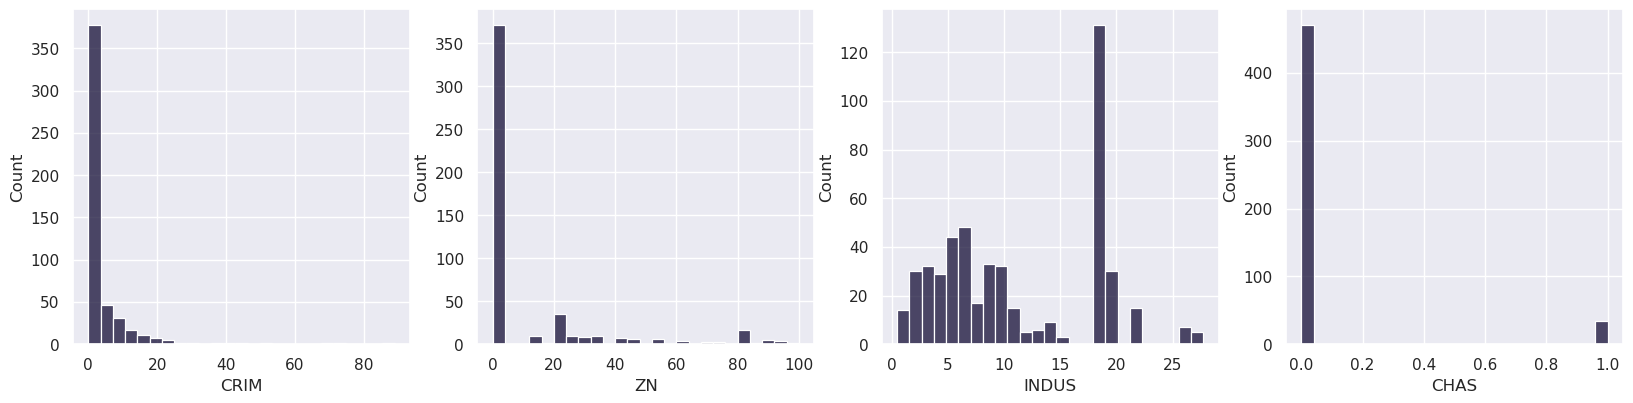

In [20]:
## According to numerical dataset visualization for histplot
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.histplot(df["CRIM"],bins=25)
plt.subplot(4,4,2)
sns.histplot(df["ZN"],bins=25)
plt.subplot(4,4,3)
sns.histplot(df["INDUS"],bins=25)
plt.subplot(4,4,4)
sns.histplot(df["CHAS"],bins=25)
plt.show()



## Observation:
1. Insight into the CRIM columns : (per capital crime rate by town), the frequency of counts, zero crim properties are 350 above and the crime rate by town is 0.5 to 80.5 properties of the range, from the crime most of the range  of counts 0.20 to 35.

2. Insight into the ZN columns: (proportion of residential land zoned for lots over 25,000 sq.ft.), the frequency of counts, the value of 0 is 350 above and the proportion of residential land zoned is 20 to 90 above.

3. Insight into the INDUS columns, the highest frequency of counts, the values of 17-18 are shown 120 above.

4. Insight into the CHAS columns, the counts of values are 0 is greater than 400 and 1 is between 0 and 40 of the range.

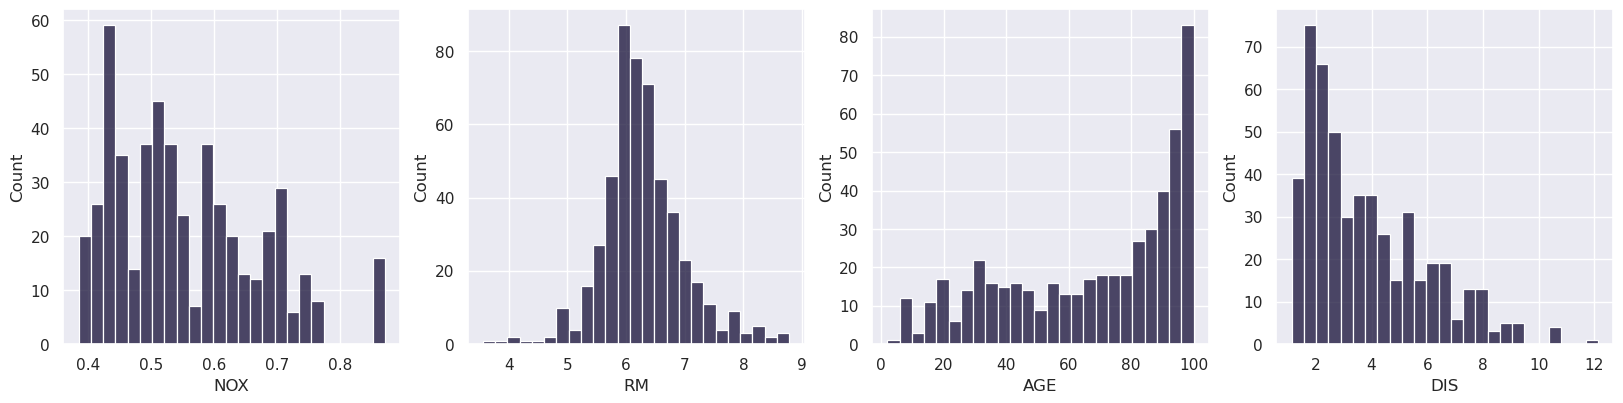

In [21]:
## According to numerical dataset visualization for histplot
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.histplot(df["NOX"],bins=25)
plt.subplot(4,4,2)
sns.histplot(df["RM"],bins=25)
plt.subplot(4,4,3)
sns.histplot(df["AGE"],bins=25)
plt.subplot(4,4,4)
sns.histplot(df["DIS"],bins=25)
plt.show()

## Observation:
1. Insight into the NOX columns, the value of counts are 20 and 30. The values are in the range of 0.4 to 0.6, the highest range of values showing.
2. Insight into the RM columns, the value of counts are4 and 80. The numbers of rooms are in the range of 5.5 to 6.5, the highest range of values showing.
3. Insight into the AGE columns, most of the properties are 85 to 100 years old and the frequency value in the range 30 to 60 is shown.
4. Insight into the DIS columns, most of the properties distances are 1 to 3 km and the frequency of the range 20 to 40 is shown.

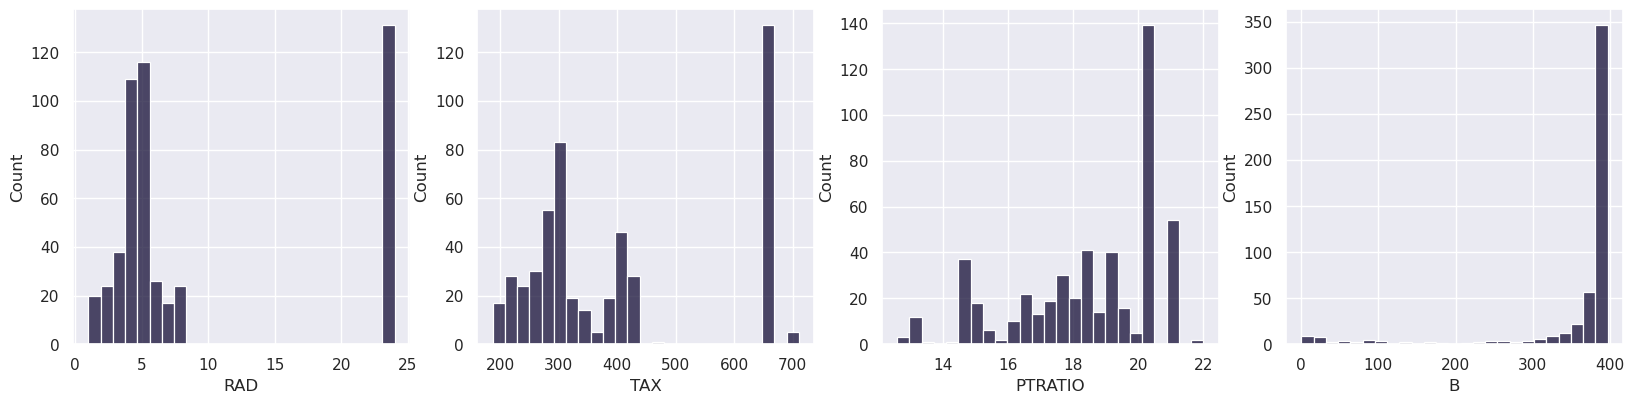

In [22]:
## According to numerical dataset visualization for histplot
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.histplot(df["RAD"],bins=25)
plt.subplot(4,4,2)
sns.histplot(df["TAX"],bins=25)
plt.subplot(4,4,3)
sns.histplot(df["PTRATIO"],bins=25)
plt.subplot(4,4,4)
sns.histplot(df["B"],bins=25)
plt.show()

## Observation:
1. The RAD columns, most of the properties near the road are 21 to 25 km and the frequency counts of the range 120 properties are shown. The average properties near roads are 4 to 5 km and the frequency counts in the range 100 to 110 properties are shown.
2. Insight into the TAX columns, the count range of 120 above the higher tax chargeble properites. The highest tax paid for properties is in the range of 660 to 690.
3. Insight into the PTRATIO columns, the frequency value of counts is 120 above. the range from 20 to 21. the highest range of ratio showing.
4. Insight into the B columns, the frequency value of counts is 250 above. the range of from 380 to 400. shown the highest range of blacks by town shown.

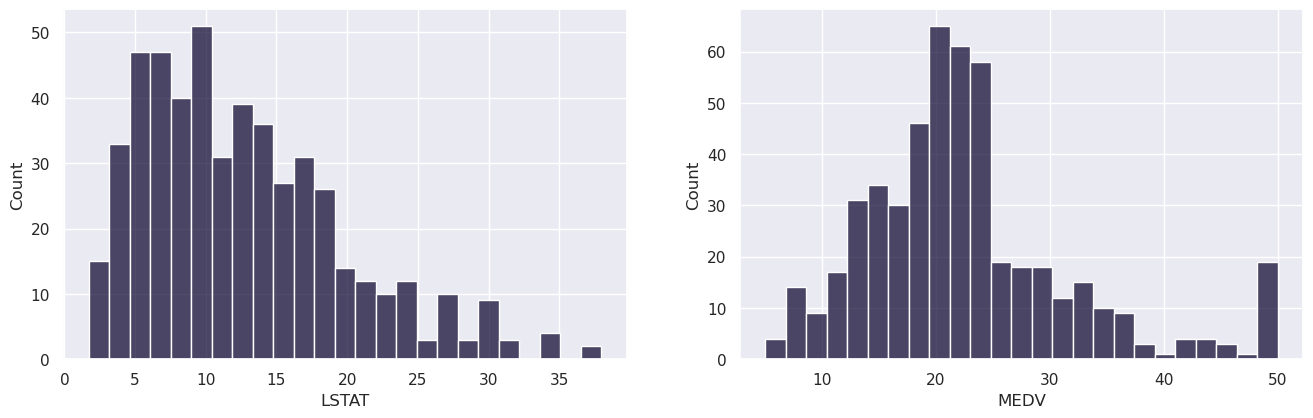

In [23]:
## According to numerical dataset visualization for histplot
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(df["LSTAT"],bins=25)
plt.subplot(2,2,2)
sns.histplot(df["MEDV"],bins=25)
plt.show()

## Observation:
1. Insight into the LSTAT columns, the frequency values of counts are 25 above. The range from 5 to 20. the highest range of lower status of the population shown.
2. Insight into the MEDV columns, the frequency value of counts is 35 above. the values of the range 15 to 25.the highest range of values shown.

## Visualizing the correlations between numerical variables

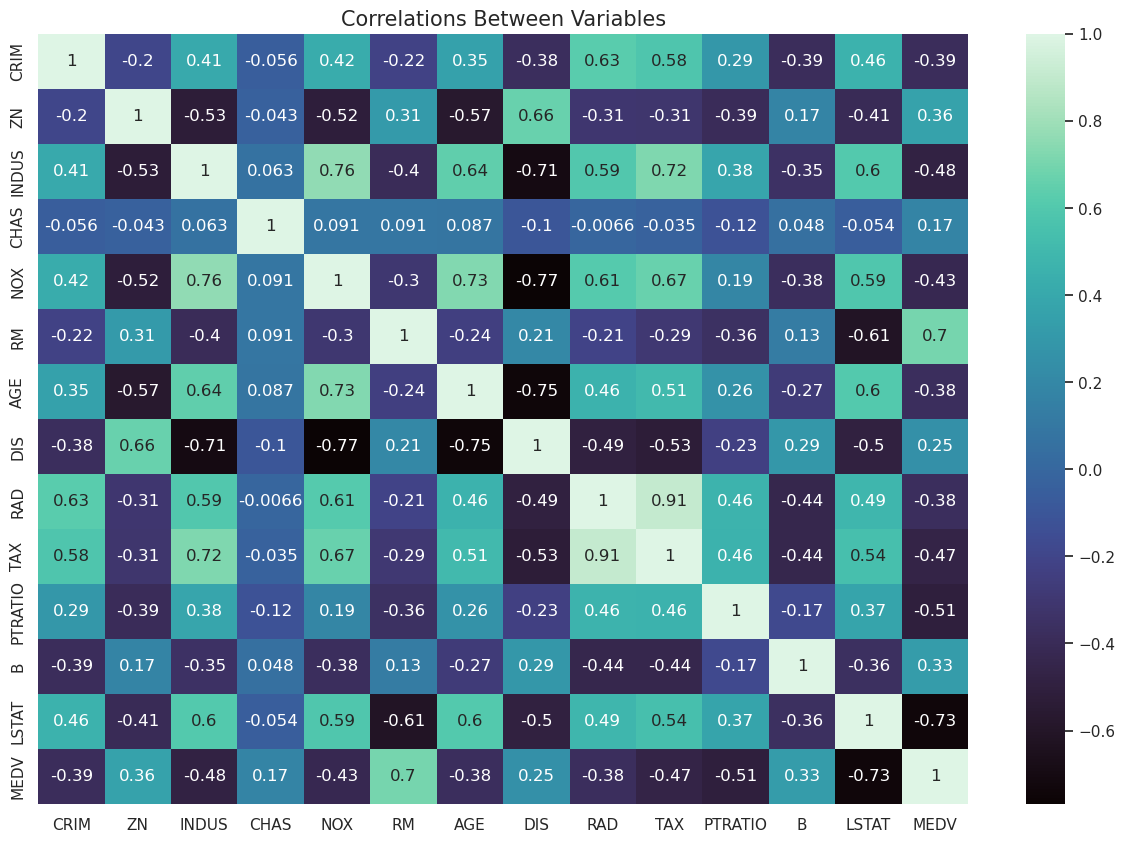

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="mako")
plt.title("Correlations Between Variables",size=15)
plt.show()

### observation:
1. Insight, the correlation is. The positive correlation shows is 0.02 to 0.1.

2. Insight, the correlation is. The negative correlation. It ranges from -0.02 to -0.06.

In [25]:
corr = df.corr()
corr["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.696134
ZN         0.360016
B          0.329548
DIS        0.248311
CHAS       0.174868
AGE       -0.376773
RAD       -0.379161
CRIM      -0.387898
NOX       -0.426326
TAX       -0.466541
INDUS     -0.484554
PTRATIO   -0.506899
LSTAT     -0.734954
Name: MEDV, dtype: float64

### 
Insight the columns are positive correlation showing (MEDV,RM,ZN,B,DIS,CHAS)

Insight the others columns are negative correlation showing.

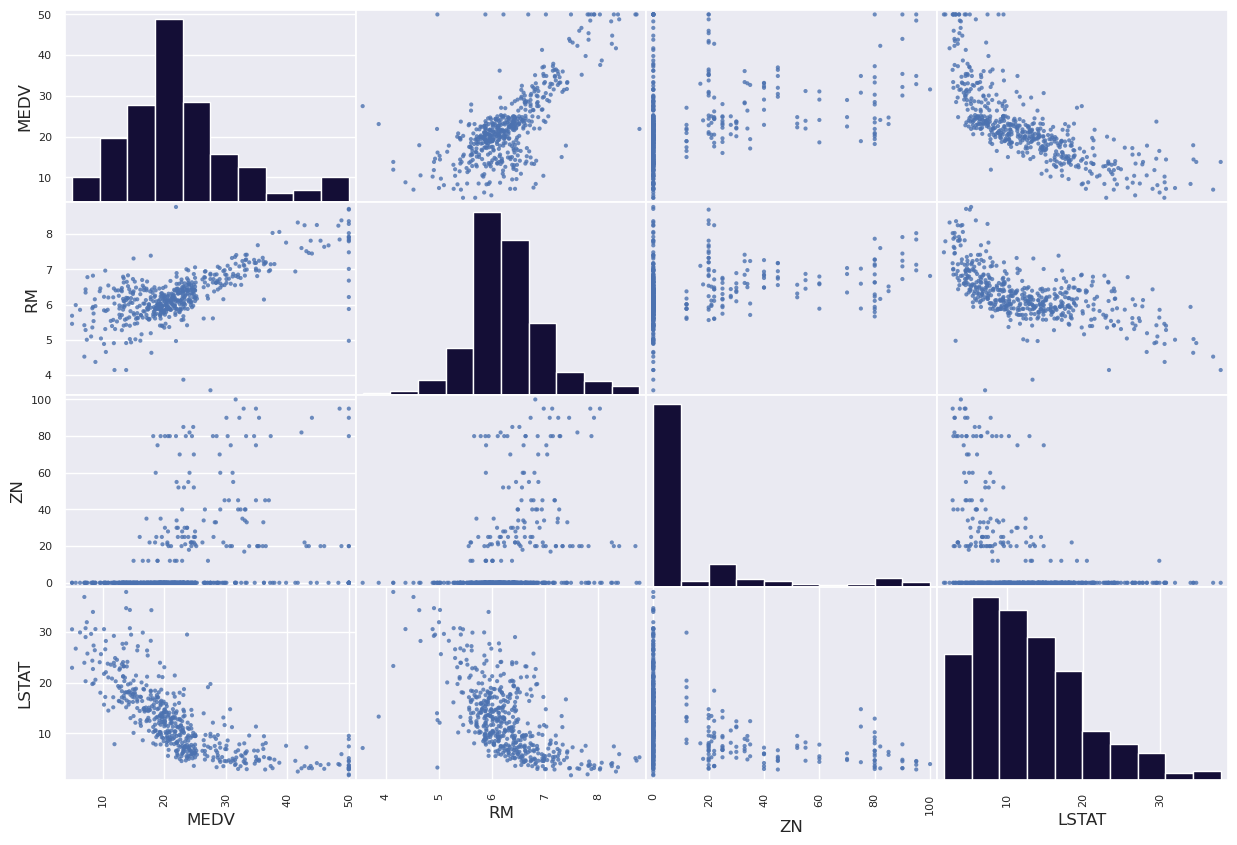

In [26]:
from pandas.plotting import scatter_matrix
a = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(df[a],color= "b",alpha=0.8,figsize=(15,10))
plt.show()

### Observation:

1. Most RMs (average number of rooms per residence) have a positive correlation of 5 to 8 with MRDV values of 20 to 40.

2. Most ZN: (proportion of residential land over 25,000 sq ft) is 20 to 80. Correlation with positive MRDV values is 20 to 40.

3. Most LSTAT: (% of population with lower status) are 10 to 40. There is a negative correlation with MRDV values of 5 to 25.

# Feature Engineering

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0.0,0.538,6.575,65,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0.0,0.469,6.421,78,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0.0,0.469,7.185,61,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0.0,0.458,6.998,45,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0.0,0.458,7.147,54,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
from sklearn.model_selection import train_test_split
train_data_set,test_data_set = train_test_split(df,test_size=0.2,random_state=42)
print(train_data_set.shape)
print(test_data_set.shape)

(404, 14)
(101, 14)


In [29]:
df["CHAS"].value_counts()

0.0    470
1.0     35
Name: CHAS, dtype: int64

In [30]:
470/35

13.428571428571429

In [31]:
train_data_set["CHAS"].value_counts()

0.0    377
1.0     27
Name: CHAS, dtype: int64

In [32]:
377/27

13.962962962962964

In [33]:
test_data_set["CHAS"].value_counts()

0.0    93
1.0     8
Name: CHAS, dtype: int64

In [34]:
93/8

11.625

# Shuffle data

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_data_set_index,test_data_set_index in split.split(df,df["CHAS"]):
    train_data_set = df.loc[train_data_set_index]
    test_data_set = df.loc[test_data_set_index]

In [36]:
train_data_set["CHAS"].value_counts()

0.0    376
1.0     28
Name: CHAS, dtype: int64

In [37]:
376/28

13.428571428571429

In [38]:
test_data_set["CHAS"].value_counts()

0.0    94
1.0     7
Name: CHAS, dtype: int64

In [39]:
94/7

13.428571428571429

## x,y spliting from train_dataset

In [40]:
x = train_data_set.drop(columns=["LSTAT","MEDV"],axis=1)
y = train_data_set["MEDV"]
print(x.head())
print(y.head())

         CRIM  ZN  INDUS  CHAS    NOX     RM  AGE     DIS  RAD  TAX  PTRATIO  \
254   0.04819  80   3.64   0.0  0.392  6.108   32  9.2203    1  315     16.4   
348   0.01501  80   2.01   0.0  0.435  6.635   29  8.3440    4  280     17.0   
476  15.02340   0  18.10   0.0  0.614  5.304   97  2.1007   24  666     20.2   
321   0.18159   0   7.38   0.0  0.493  6.376   54  4.5404    5  287     19.6   
326   0.30347   0   7.38   0.0  0.493  6.312   28  5.4159    5  287     19.6   

          B  
254  392.89  
348  390.94  
476  349.48  
321  396.90  
326  396.90  
254    21.9
348    24.5
476    12.0
321    23.1
326    23.0
Name: MEDV, dtype: float64


In [41]:
x.shape,y.shape

((404, 12), (404,))

## Scikit learn library has three main interfaces(API):

1. Estimators: Main and core interface of Scikit-learn. Shortly, we say that estimators are the classes which can learn and estimate some parameters of the data with the fit() method. All of the estimator’s hyperparameters are accessible directly via public instance variables. For example, Random forest algorithm is an estimator.


2. Transformers : Estimators which can also transform data with transform() or fit_transform() methods are called Transformers.


3. Predictors: Some estimators can also predict a value. For example we can predict quantities with the finalized regression model by calling the predict() and score() function on the finalized model.

# Train Test spliting

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(323, 12)
(81, 12)
(323,)
(81,)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))




4.1250593977686645
6.683835355479767
0.5466805546033691


## Feature Scaling

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization or standardization. Feature scaling is generally performed during the data pre-processing stage, before training models using machine learning algorithms.

In [44]:
a = ['ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B']

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[a] = scaler.fit_transform(x_train[a])
x_test[a] = scaler.fit_transform(x_test[a])
print(x_train[:1])
print(x_test[:1])

        CRIM        ZN     INDUS  CHAS    NOX        RM       AGE      DIS  \
114  0.14231 -0.485117 -0.167271   0.0  0.547 -0.027744  0.577569 -0.74224   

          RAD       TAX  PTRATIO         B  
114 -0.415215  0.153904 -0.31976  0.348919  
        CRIM        ZN     INDUS  CHAS    NOX        RM       AGE       DIS  \
285  0.01096  1.933133 -1.394755   0.0  0.389  0.225622 -1.423292  1.526001   

          RAD       TAX  PTRATIO         B  
285 -1.042037 -0.791377 -1.42534  0.466478  


In [46]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
114,0.14231,-0.485117,-0.167271,0.0,0.547,-0.027744,0.577569,-0.742240,-0.415215,0.153904,-0.319760,0.348919
308,0.49298,-0.485117,-0.183672,0.0,0.544,0.503666,0.506864,-0.218054,-0.646647,-0.610698,-0.034055,0.438079


## Machine learning model building
A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

** LinearRegression.

** DecisionTreeRegressor.

** RandomForestRegressor.

** BaggingRegressor.

** AdaBoostRegressor.

** KNeighborsRegressor.

** SVR.

### Cross_validation_score function creating.
Cross validation is a technique for assessing how the statistical analysis generalises to an independent data set.It is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data.

In [47]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    score = cross_val_score(model,x_train,y_train,cv=5,scoring="neg_mean_squared_error")
    score_cv = np.sqrt(-score)
    score_cv_mean = score_cv.mean()
    return score_cv_mean

# LinearRegression
In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

In [48]:
# Import the sklearn necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


### Create a linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(x_train,y_train)


# Predict the prices on the test data
y_pred = lr_model.predict(x_test)

#Calculate the cross_val_score using by funtion
score_cv_1 = rmse_cv(lr_model)

# Calculate the mean_absolute_error and mean_squared_error , r2_score
mae_1 = mean_absolute_error(y_test,y_pred)
rmse_1 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_1 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_1,3))
print("root_mean_squared_error:",round(rmse_1,3))
print("r2_score:",round(r2_1,3))
print("-"*27)
print("cross_val_score:",round(score_cv_1,3))

mean_absolute_error: 4.087
root_mean_squared_error: 6.724
r2_score: 0.541
---------------------------
cross_val_score: 5.325


## Decision Tree Regressor
Decision tree builds regression or classification models in the form of a tree structure.

In [49]:
from sklearn.tree import DecisionTreeRegressor


DT_model = DecisionTreeRegressor()
DT_model.fit(x_train,y_train)
y_pred = DT_model.predict(x_test)
score_cv_2 = rmse_cv(DT_model)

mae_2 = mean_absolute_error(y_test,y_pred)
rmse_2 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_2 = r2_score(y_test,y_pred)
print("mean_absolute_error:",round(mae_2,3))
print("root_mean_squared_error:",round(rmse_2,3))
print("r2_score:",round(r2_2,3))
print("-"*27)
print("cross_val_score:",round(score_cv_2,3))

mean_absolute_error: 3.607
root_mean_squared_error: 6.317
r2_score: 0.595
---------------------------
cross_val_score: 5.319


## RandomForestRegressor
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [50]:
from sklearn.ensemble import RandomForestRegressor


RF_model = RandomForestRegressor()
RF_model.fit(x_train,y_train)
y_pred = RF_model.predict(x_test)
score_cv_3 = rmse_cv(RF_model)

mae_3 = mean_absolute_error(y_test,y_pred)
rmse_3 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_3 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_3,3))
print("root_mean_squared_error:",round(rmse_3,3))
print("r2_score:",round(r2_3,3))
print("-"*27)
print("cross_val_score:",round(score_cv_3,3))

mean_absolute_error: 3.465
root_mean_squared_error: 6.661
r2_score: 0.55
---------------------------
cross_val_score: 4.452


### Bagging regressor
A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [51]:
from sklearn.ensemble import BaggingRegressor


BR_model = BaggingRegressor()
BR_model.fit(x_train,y_train)
y_pred = BR_model.predict(x_test)
score_cv_4 = rmse_cv(BR_model)

mae_4 = mean_absolute_error(y_test,y_pred)
rmse_4 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_4 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_4,3))
print("root_mean_squared_error:",round(rmse_4,3))
print("r2_score:",round(r2_4,3))
print("-"*27)
print("cross_val_score:",round(score_cv_4,3))

mean_absolute_error: 3.484
root_mean_squared_error: 6.668
r2_score: 0.549
---------------------------
cross_val_score: 4.702


### Ada Boost Regressor
An AdaBoost regressor. An AdaBoost [1] regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

In [52]:
from sklearn.ensemble import AdaBoostRegressor


AB_model = AdaBoostRegressor()
AB_model.fit(x_train,y_train)
y_pred = AB_model.predict(x_test)
score_cv_5 = rmse_cv(AB_model)

mae_5 = mean_absolute_error(y_test,y_pred)
rmse_5 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_5 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_5,3))
print("root_mean_squared_error:",round(rmse_5,3))
print("r2_score:",round(r2_5,3))
print("-"*27)
print("cross_val_score:",round(score_cv_5,3))

mean_absolute_error: 3.818
root_mean_squared_error: 6.55
r2_score: 0.565
---------------------------
cross_val_score: 4.499


### Regression based on k-nearest neighbors.
The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [53]:
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
score_cv_6 = rmse_cv(knn_model)

mae_6 = mean_absolute_error(y_test,y_pred)
rmse_6 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_6 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_6,3))
print("root_mean_squared_error:",round(rmse_6,3))
print("r2_score:",round(r2_6,3))
print("-"*27)
print("cross_val_score:",round(score_cv_6,3))

mean_absolute_error: 3.56
root_mean_squared_error: 6.338
r2_score: 0.592
---------------------------
cross_val_score: 5.166


## Support vector machine
(SVM) is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups.

In [54]:
from sklearn.svm import SVR


SVR_model = SVR()
SVR_model.fit(x_train,y_train)
y_pred = SVR_model.predict(x_test)
score_cv_7 = rmse_cv(SVR_model)

mae_7 = mean_absolute_error(y_test,y_pred)
rmse_7 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_7 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_7,3))
print("root_mean_squared_error:",round(rmse_7,3))
print("r2_score:",round(r2_7,3))
print("-"*27)
print("cross_val_score:",round(score_cv_7,3))

mean_absolute_error: 4.807
root_mean_squared_error: 7.957
r2_score: 0.358
---------------------------
cross_val_score: 6.905


### Model Comparison

In [55]:
## models wise create the dataframe
df_1 = pd.DataFrame({"models_names":["LinearRegression","DecisionTreeRegressor",
                                   "RandomForestRegressor","BaggingRegressor","AdaBoostRegressor"
                                     ,"KNeighborsRegressor","SVR"],
                   "mean_absolute_error":[mae_1, mae_2, mae_3, mae_4, mae_5, mae_6, mae_7],
                   "root_mean_squared_error":[rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7],
                   "r2_score":[r2_1,r2_2,r2_3,r2_4,r2_5,r2_6,r2_7],
                   "rmse_cv_score":[score_cv_1, score_cv_2, score_cv_3, score_cv_4, score_cv_5, score_cv_6, score_cv_7]})

df_1.sort_values(by="rmse_cv_score",ascending=False)

,models_names,mean_absolute_error,root_mean_squared_error,r2_score,rmse_cv_score
6,SVR,4.807202,7.956982,0.357535,6.904596
0,LinearRegression,4.086815,6.724290,0.541176,5.325348
1,DecisionTreeRegressor,3.607407,6.316977,0.595078,5.318857
5,KNeighborsRegressor,3.559753,6.338071,0.592369,5.166063
3,BaggingRegressor,3.483951,6.667505,0.548893,4.702152
4,AdaBoostRegressor,3.818382,6.549965,0.564658,4.499339
2,RandomForestRegressor,3.464864,6.661057,0.549765,4.451671


### Observation:
1. cv_score lower_error_prediction_price model is AdaBoostRegressor 4.38.

2. Mean_absolute_error lower_error_prediction_price model is RandomForestRegressor 3.49.

2. R_Score best near by distances prediction_price model is RandomForestRegressor 0.55.

3. root_mean_squared_Error best prediction_price model is KNeighborsRegressor 6.33.




<AxesSubplot:title={'center':'Model Comparison'}, xlabel='models_names', ylabel='scores'>

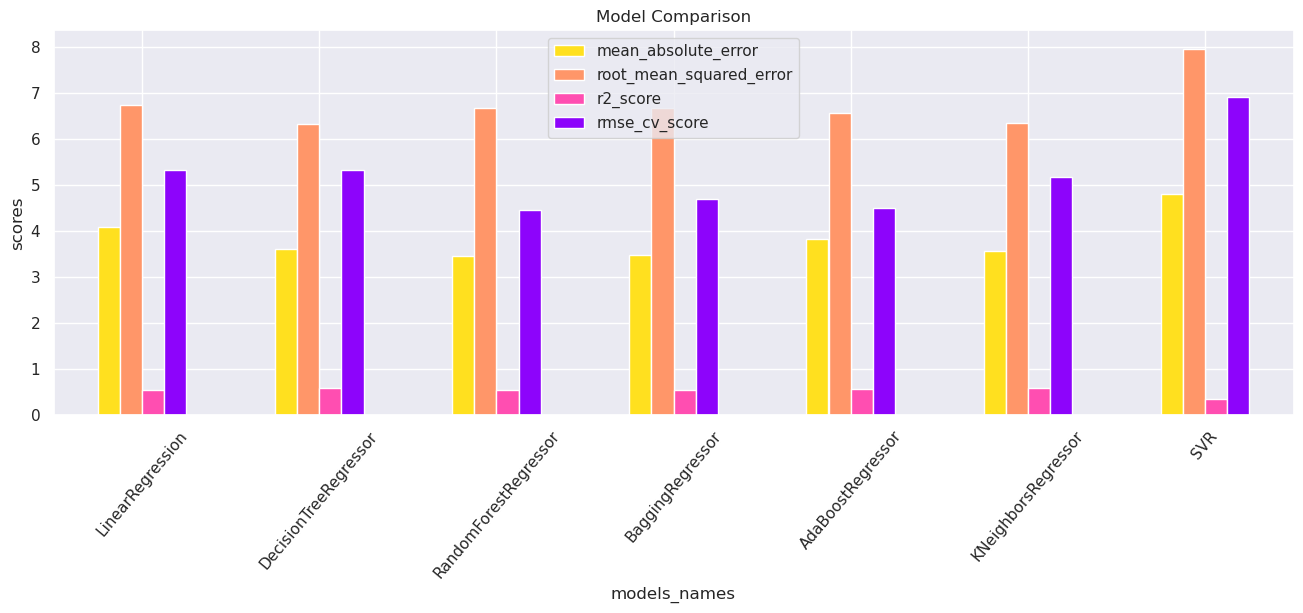

In [56]:
### visualtion barplot used 
patt = sns.color_palette("gnuplot2_r")
df_1.plot.bar(x="models_names",rot=50,ylabel= "scores",title = "Model Comparison",color=patt,figsize=(16,5))

In [57]:
#test dataset 
test_data_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
176,0.07022,0,4.05,0.0,0.510,6.020,47,3.5549,5,296,16.6,393.23,10.11,23.2
284,0.00906,90,2.97,0.0,0.400,7.088,20,7.3073,1,285,15.3,394.72,7.85,32.2
223,0.61470,0,6.20,0.0,0.507,6.618,80,3.2721,8,307,17.4,396.90,7.60,30.1
87,0.07151,0,4.49,0.0,0.449,6.121,56,3.7476,3,247,18.5,395.15,8.44,22.2
261,0.53412,20,3.97,0.0,0.647,7.520,89,2.1398,5,264,13.0,388.37,7.26,43.1


In [58]:
xtest = test_data_set.iloc[:,:-2]
ytest = test_data_set["MEDV"]

In [59]:
xtest[a] = scaler.fit_transform(xtest[a])
print(xtest.head(2))

        CRIM        ZN     INDUS  CHAS   NOX        RM       AGE       DIS  \
176  0.07022 -0.494503 -0.917534   0.0  0.51 -0.432194 -0.729081 -0.200391   
284  0.00906  2.781759 -1.073247   0.0  0.40  1.165745 -1.698937  1.553720   

          RAD       TAX   PTRATIO         B  
176 -0.429246 -0.571904 -0.769465  0.360701  
284 -0.900483 -0.637139 -1.332624  0.382472  


In [60]:
xtest = pd.DataFrame(xtest)
xtest.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
176,0.07022,-0.494503,-0.917534,0.0,0.51,-0.432194,-0.729081,-0.200391,-0.429246,-0.571904,-0.769465,0.360701
284,0.00906,2.781759,-1.073247,0.0,0.40,1.165745,-1.698937,1.553720,-0.900483,-0.637139,-1.332624,0.382472


In [61]:
from sklearn.ensemble import RandomForestRegressor


RF_model = RandomForestRegressor()
#RF_model = AdaBoostRegressor()
RF_model.fit(x_train,y_train)
y_pred = RF_model.predict(xtest)
score_cv_3 = rmse_cv(RF_model)

mae_3 = mean_absolute_error(ytest,y_pred)
rmse_3 = np.sqrt(mean_squared_error(ytest,y_pred))
r2_3 = r2_score(ytest,y_pred)

print("mean_absolute_error:",round(mae_3,3))
print("root_mean_squared_error:",round(rmse_3,3))
print("r2_score:",round(r2_3,3))
print("-"*27)
print("cross_val_score:",round(score_cv_3,3))

mean_absolute_error: 2.851
root_mean_squared_error: 4.062
r2_score: 0.768
---------------------------
cross_val_score: 4.51
